### Regula Perceptronului

In [114]:
import numpy as np

class Perceptron(object):
    def __init__(self, lrg_rate=0.01, n_iter=100, rng_seed=229510755):
        self.lrg_rate = lrg_rate
        self.n_iter = n_iter
        self.rng_seed = rng_seed

    def train(self, X, y):
        rgen = np.random.RandomState(self.rng_seed)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lrg_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [115]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)

## Antrenam Percetronul cu setul de 5 setosa 5 versicolor

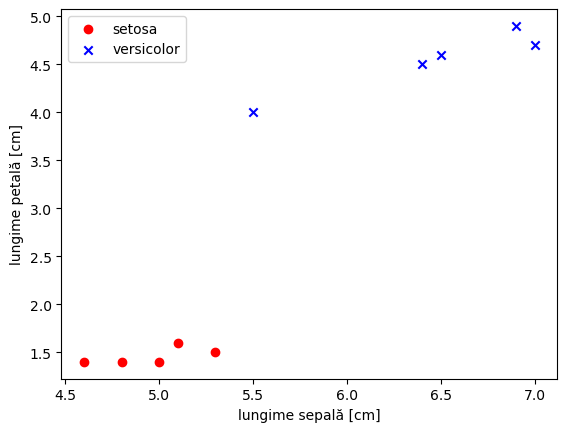

In [116]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[45:55, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[45:55, [0, 2]].values

plt.scatter(X[:5, 0], X[:5, 1],
            color='red', marker='o', label='setosa')

plt.scatter(X[5:10, 0], X[5:10, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('lungime sepală [cm]')
plt.ylabel('lungime petală [cm]')
plt.legend(loc='upper left')

plt.show()

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 6, 5, 5, 4, 4, 3, 3, 3, 2, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


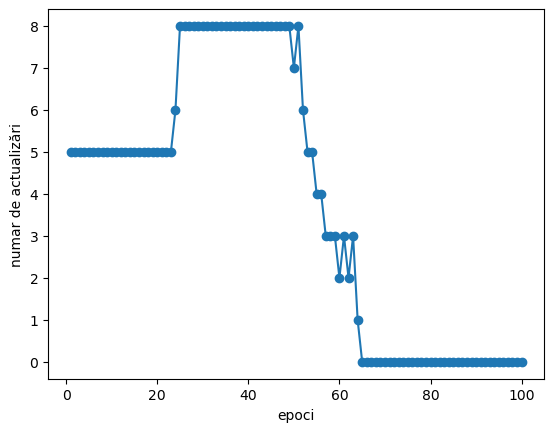

In [117]:
ppn = Perceptron(lrg_rate=0.00001, n_iter=100)

ppn.train(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
print(ppn.errors_)
plt.xlabel('epoci')
plt.ylabel('numar de actualizări')

plt.show()

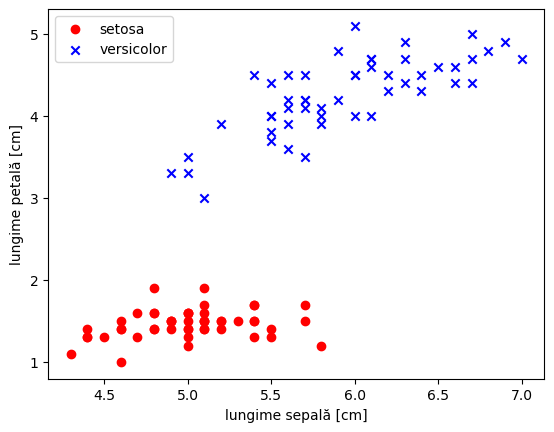

[50, 50, 51, 33, 30, 25, 21, 18, 14, 11, 10, 9, 7, 6, 5, 4, 4, 3, 3, 2, 3, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


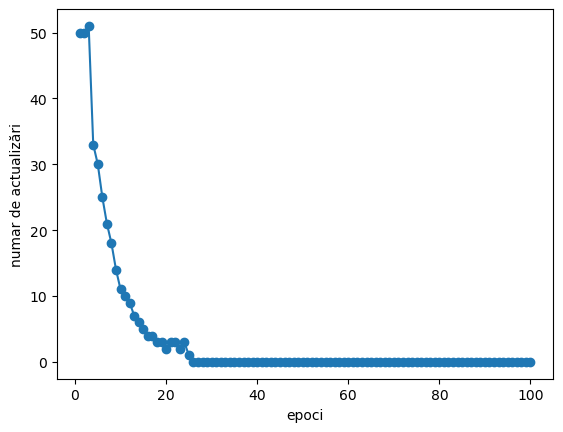

In [118]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('lungime sepală [cm]')
plt.ylabel('lungime petală [cm]')
plt.legend(loc='upper left')

plt.show()
ppn.train(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
print(ppn.errors_)
plt.xlabel('epoci')
plt.ylabel('numar de actualizări')

plt.show()

In [119]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl
                    )

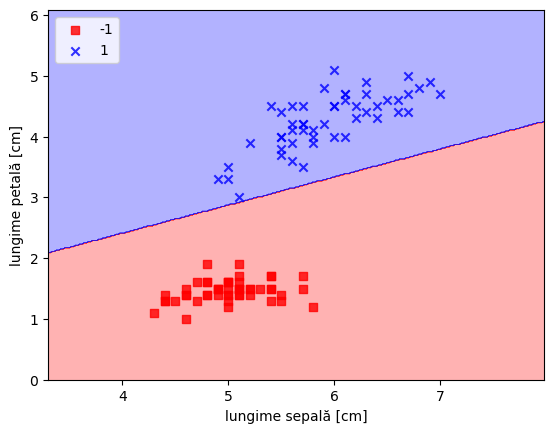

In [120]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('lungime sepală [cm]')
plt.ylabel('lungime petală [cm]')
plt.legend(loc='upper left')


plt.show()